## <div align="center"> TUGAS LAB IF540 MACHINE LEARNING </div>
### <div align="center"> WEEK 05 : Regresi dan Induksi Pohon Keputusan
 </div>

#### <div align="center"> Semester Genap 2022/2023 </div>

In [53]:
# Run this code when you restart the machine
# Fill in with YOUR name and NIM
import datetime
import uuid

myName = "Christopher Darren"
myNIM = "00000054804"

In [ ]:
myDate = datetime.datetime.now()
myDevice = str(uuid.uuid1())

print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Start: \t\t{}".format(myDate))
print("Device ID: \t{}".format(myDevice))


---

### Dataset yang dipakai:

1. Bombing – sumber : https://www.kaggle.com/datasets/usaf/world-war-ii
2. Bigmac – sumber : https://www.kaggle.com/datasets/vittoriogiatti/bigmacprice
3. Weather Conditions in World War Two – sumber : https://www.kaggle.com/datasets/smid80/weatherww2?select=Summary+of+Weather.csv

---

### Hasil kerja

## Linear Regression
#### Simple Linear Regression

In [57]:
#import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

#### Importing system library

In [58]:
#import sys

#### Importing numpy library

In [59]:
import numpy as np

#### import dataset

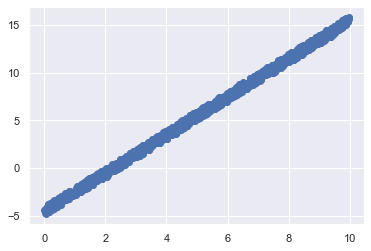

In [60]:
rng = np.random.RandomState(1)
x=10*rng.rand(1080)
y=2*x-5+rng.rand(1080)
plt.scatter(x,y)

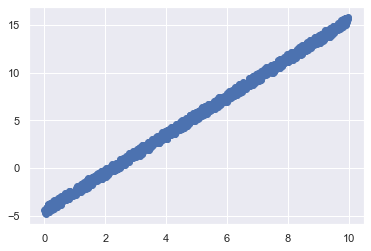

In [61]:
#Scikit-Learn’s LinearRegression estimator to fit this data and construct the best-fit line
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit);

In [62]:
print("Model slope:     ", model.coef_[0])
print("Model intercept: ", model.intercept_)

Model slope:      2.0010926297623297
Model intercept:  -4.493248492579986


In [63]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(1080 ,3)
y = 0.5 +np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.49999999999997735
[ 1.5 -2.   1. ]


#### Polynomial Basis Functions

In [64]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2 , 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [65]:
#Lets make a 7-th degree polynomial model this way:

from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

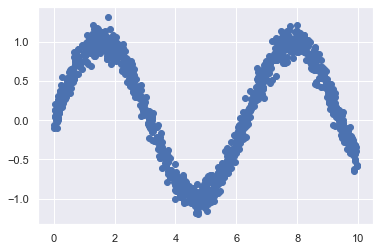

In [66]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(1080)
y = np.sin(x) + 0.1 * rng.randn(1080)

poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

#### Gaussian Basis Function

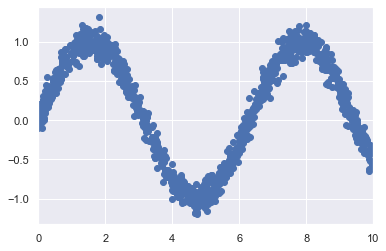

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x-y)/width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        #create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#### Regularization

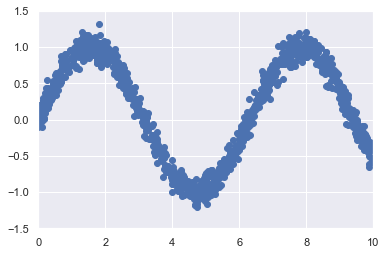

In [68]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

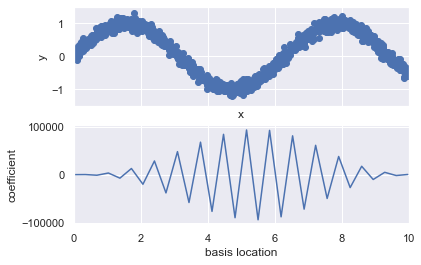

In [69]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)
        
    ax[1].plot(model.steps[0][1].centers_,
              model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
             ylabel='coefficient',
             xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Ridge Regression

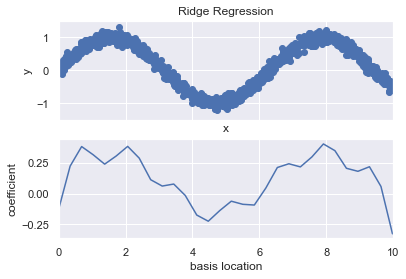

In [70]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

#### Lasso Regression (L1 regularization)

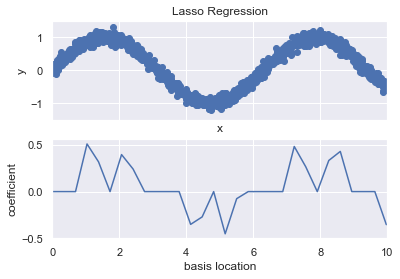

In [71]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Tugas Linear Regression 2 Dataset: 

In [72]:
import pandas as pd

bomb = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week5\operations.csv', index_col='Mission Date', parse_dates=True)
weathersum = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week5\Summary of Weather.csv', index_col='Date', parse_dates=True)
bomb.head(1)

C:\Users\Darren\AppData\Local\Temp\ipykernel_26300\3561562552.py:3: DtypeWarning: Columns (7,8,11,13,31,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  bomb = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week5\operations.csv', index_col='Mission Date', parse_dates=True)
C:\Users\Darren\AppData\Local\Temp\ipykernel_26300\3561562552.py:4: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  weathersum = pd.read_csv(r'D:\SEMESTER 4\IF540 Machine Learning\LAB\week5\Summary of Weather.csv', index_col='Date', parse_dates=True)


,Mission ID,Theater of Operations,Country,Air Force,Unit ID,Aircraft Series,Callsign,Mission Type,Takeoff Base,Takeoff Location,...,Incendiary Devices Weight (Tons),Fragmentation Devices,Fragmentation Devices Type,Fragmentation Devices Weight (Pounds),Fragmentation Devices Weight (Tons),Total Weight (Pounds),Total Weight (Tons),Time Over Target,Bomb Damage Assessment,Source ID
Mission Date,,,,,,,,,,,,,,,,,,,,,
1943-08-15,1,MTO,USA,12 AF,27 FBG/86 FBG,A36,NaN,NaN,PONTE OLIVO AIRFIELD,SICILY,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN


In [73]:
weathersum.head(1)

,STA,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
Date,,,,,,,,,,,,,,,,,,,,,
1942-07-01,10001,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
bomb.info()
weathersum.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 178281 entries, 1943-08-15 to 1945-02-16
Data columns (total 45 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Mission ID                             178281 non-null  int64  
 1   Theater of Operations                  175123 non-null  object 
 2   Country                                126494 non-null  object 
 3   Air Force                              126444 non-null  object 
 4   Unit ID                                50913 non-null   object 
 5   Aircraft Series                        178165 non-null  object 
 6   Callsign                               21 non-null      object 
 7   Mission Type                           47186 non-null   object 
 8   Takeoff Base                           3383 non-null    object 
 9   Takeoff Location                       3338 non-null    object 
 10  Takeoff Latitude                       2

In [75]:
#drop data yang NAN

#drop countries that are NaN
bomb = bomb[pd.isna(bomb.Country)==False]
#drop if target longitude is NaN
bomb = bomb[pd.isna(bomb['Target Longitude'])==False]
#Drop if takeoff longitude is NaN
bomb = bomb[pd.isna(bomb['Takeoff Longitude'])==False]
# drop unused features
drop_list = ['Mission ID','Unit ID','Target ID','Altitude (Hundreds of Feet)','Airborne Aircraft',
             'Attacking Aircraft', 'Bombing Aircraft', 'Aircraft Returned',
             'Aircraft Failed', 'Aircraft Damaged', 'Aircraft Lost',
             'High Explosives', 'High Explosives Type','Mission Type',
             'High Explosives Weight (Pounds)', 'High Explosives Weight (Tons)',
             'Incendiary Devices', 'Incendiary Devices Type',
             'Incendiary Devices Weight (Pounds)',
             'Incendiary Devices Weight (Tons)', 'Fragmentation Devices',
             'Fragmentation Devices Type', 'Fragmentation Devices Weight (Pounds)',
             'Fragmentation Devices Weight (Tons)', 'Total Weight (Pounds)',
             'Total Weight (Tons)', 'Time Over Target', 'Bomb Damage Assessment','Source ID']
bomb.drop(drop_list, axis=1,inplace = True)
bomb = bomb[bomb.iloc[:,8]!="4248"] # drop this takeoff latitude 
bomb = bomb[bomb.iloc[:,9]!=1355]   # drop this takeoff longitude

In [76]:
#checking if NAN is rid

bomb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2942 entries, 1943-08-15 to 1945-02-15
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Theater of Operations  2763 non-null   object 
 1   Country                2942 non-null   object 
 2   Air Force              2892 non-null   object 
 3   Aircraft Series        2915 non-null   object 
 4   Callsign               10 non-null     object 
 5   Takeoff Base           2942 non-null   object 
 6   Takeoff Location       2942 non-null   object 
 7   Takeoff Latitude       2942 non-null   object 
 8   Takeoff Longitude      2942 non-null   float64
 9   Target Country         2707 non-null   object 
 10  Target City            2939 non-null   object 
 11  Target Type            602 non-null    object 
 12  Target Industry        81 non-null     object 
 13  Target Priority        616 non-null    object 
 14  Target Latitude        2942 non-null  

In [77]:
daily = bomb.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] #remove other columns

In [78]:
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)

In [79]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('1941','1945')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

C:\Users\Darren\AppData\Local\Temp\ipykernel_26300\1695068802.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  days = (date - pd.datetime(2000, 12, 21)).days


(8.0, 17.0)

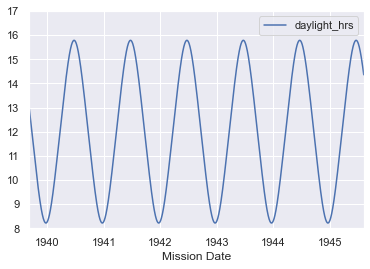

In [80]:
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude))
        * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot()
plt.ylim(8,17)

In [81]:
# temperatures are in 1/10 deg c; convert to C
weathersum['MIN'] /= 10
weathersum['MAX'] /= 10
weathersum['MaxTemp'] = 0.5 * (weathersum['MIN'] + weathersum['MAX'])

# precip is in 1/10 mm; convert to inches
weathersum['PRCP'] /= 254
weathersum['other'] = (weathersum['PRCP'] == 0).astype(int)

daily = daily.join(weathersum[['PRCP','MIN','MAX']])

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [ ]:
daily['annual'] = (daily.index - daily.index[0]).days /365.

In [82]:
daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs
Mission Date,,,,,,,,,,
1939-09-03,62.276948,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,13.077233
1939-09-04,186.862940,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.019700
1939-09-05,56.663337,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,12.962013
1939-09-06,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,12.904182
1939-09-07,60.296670,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.846217


In [83]:
# Drop any rows with null values
daily.dropna(axis=0, how='any', inplace=True)

column_names = ['Mon', 'Tue','Wed','Thu', 'Fri', 'Sat','Sun','holiday',
               'daylight_hrs','PRCP','other','MaxTemp','annual']
X = daily[column_names]
y = daily['Total']

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
daily['predicted'] = model.predict(X)

KeyError: "['PRCP', 'other', 'MaxTemp', 'annual'] not in index"

In [84]:
daily[['Total','predicted']].plot(alpha=0.5);

KeyError: "['predicted'] not in index"

In [85]:
params = pd.Series(model.coef_, index=X.columns)
params

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [86]:
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X,y)).coef_
            for i in range(1000)],0)

AttributeError: 'Pipeline' object has no attribute 'coef_'

In [87]:
print(pd.DataFrame({'effect': params.round(0),
                   'effect': err.round(0)}))

NameError: name 'params' is not defined

## DECISION TREES LEARNING

In [88]:
#!pip install mglearn

In [89]:
import numpy as np
import sklearn.datasets
import mglearn
import matplotlib.pyplot as plt

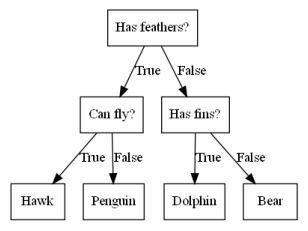

In [90]:
#Build decision tree from animal dataset.

mglearn.plots.plot_animal_tree()

### Building Decision Trees

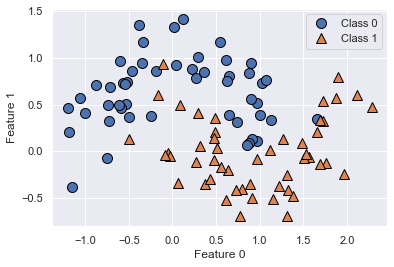

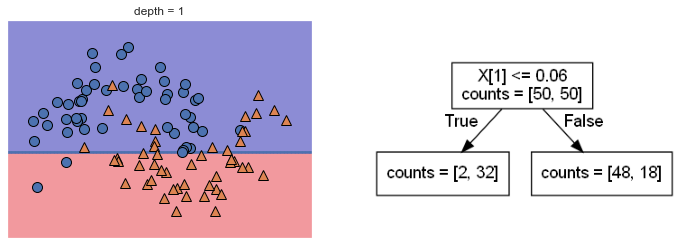

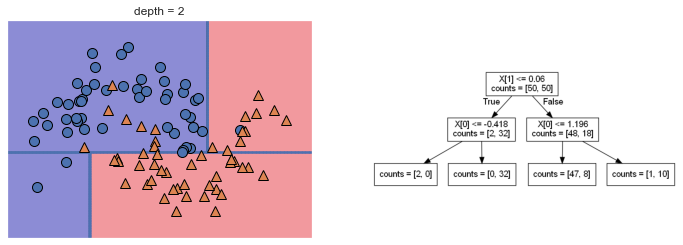

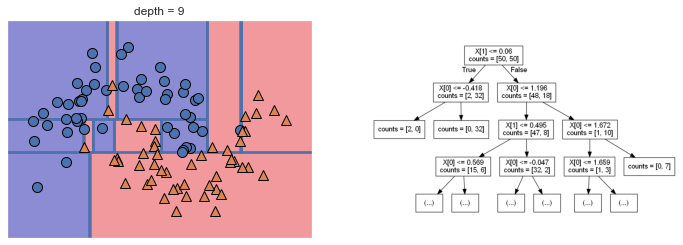

In [91]:
mglearn.plots.plot_tree_progressive()

### Controlling Complexity of Decision Trees

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [93]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(x_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


### Analying Decision Trees

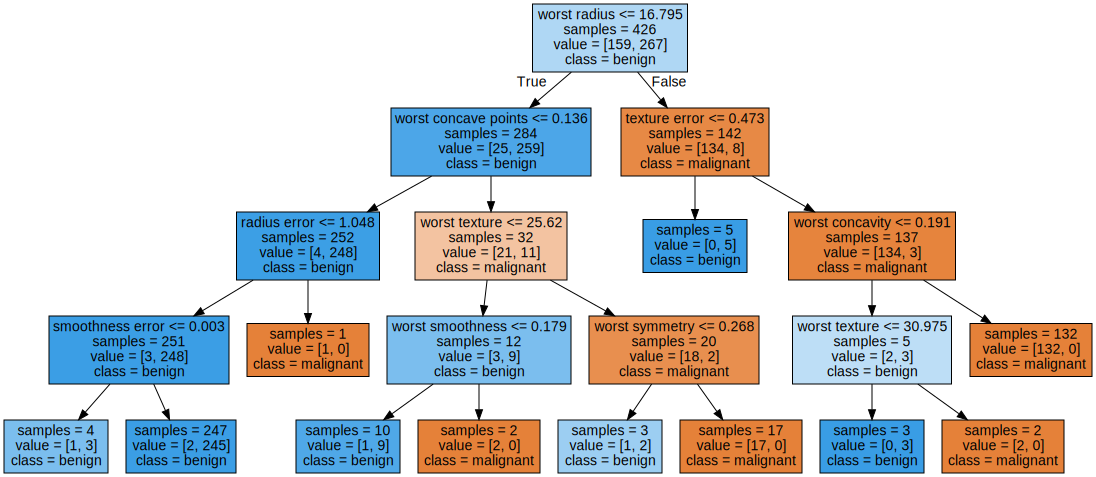

In [94]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
               feature_names=cancer.feature_names, impurity=False ,filled=True)

import graphviz

with open("tree.dot")as f:
    dot_graph= f.read()
graphviz.Source(dot_graph)

### Feature Importance in Trees

In [95]:
print("Features importances:\n{}".format(tree.feature_importances_))

Features importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


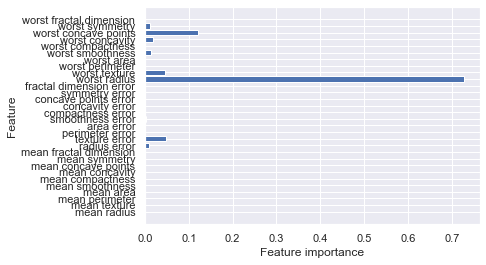

In [96]:
def plot_feature_importances_cancer(model):
    n_features= cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


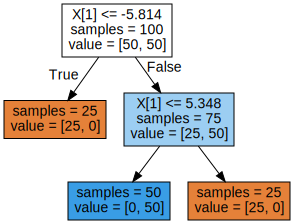

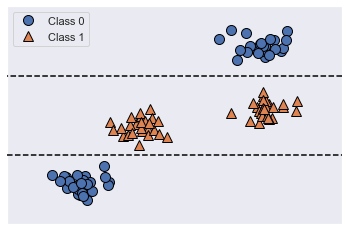

In [97]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [98]:
import os

In [99]:
os.getcwd()

'D:\\SEMESTER 4\\IF540 Machine Learning\\LAB\\week5'

In [100]:
os.chdir('D:\\SEMESTER 4\\IF540 Machine Learning\\LAB\\week5')

In [101]:
os.getcwd()

'D:\\SEMESTER 4\\IF540 Machine Learning\\LAB\\week5'

In [102]:
oil = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, r"BigmacPrice.csv"))
oil.head(5)

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1,2.50
1,2000-04-01,AUD,Australia,2.59,1,2.59
2,2000-04-01,BRL,Brazil,2.95,1,2.95
3,2000-04-01,GBP,Britain,1.90,1,1.90
4,2000-04-01,CAD,Canada,2.85,1,2.85


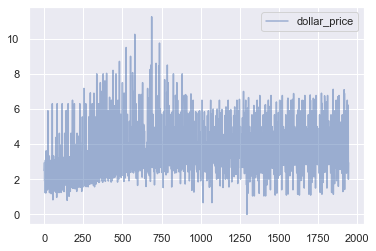

In [103]:
#oil.plot(alpha=0.5)

oil[["date","dollar_price"]].plot(alpha=0.5)
plt.show()

### Random Forests

#### Analyzing Random Forests

In [104]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

#use historical data to forecast prices after the year 2000
data_train = oil[oil.date < 2013]
data_test = oil[oil.date >= 2000]

#predict prices based on date
x_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.dollar_price)

tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train)

# predict on all data
x_all = oil.date[:, np.newaxis]

pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

TypeError: '<' not supported between instances of 'str' and 'int'

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

x, y = make_moons(n_samples=100, noise=0.25, random_state=3)
x_train, x_test, y_train,y_test = train_test_split(x,y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

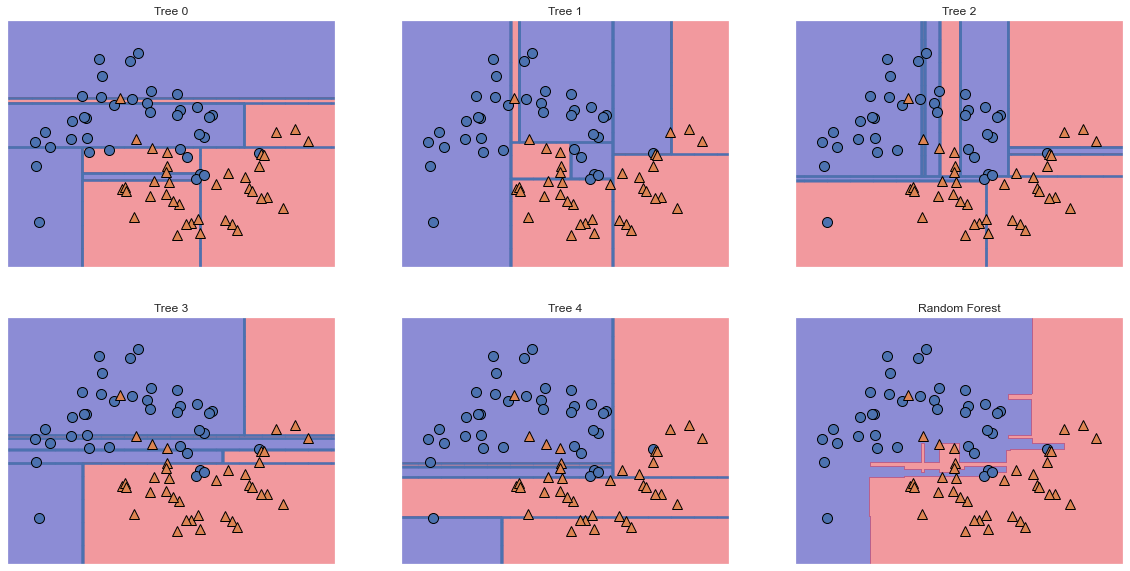

In [106]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(x_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, x_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(x_train[:, 0], x_train[:, 1], y_train)

In [107]:
x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(x_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


---

### Kesimpulan



Berikan simpulan yang dilakukan dari hasil kerja menggunakan algoritma dan 2 dataset yang
dipilih. Simpulan bisa berkisar antara (bisa di modifikasi):

    - Dari ketiga dataset tersebut hasilnya berbeda beda
    - Tingkat keakurasian data juga berbeda dari jumlah data beserta tujuannya buat apa
    - Decision Tree dan Forest penting untuk dilakukan ketika ingin menebak prediksi
    - Machine learning sangat penting untuk digunakan ketika ingin mempelajari pola pola baru dalam dataset yang tersedia.

---

In [108]:
# Footer
myDate = datetime.datetime.now()
print("I certify that this is my own work.")
print("Signed by:")
print("Name: \t\t{}".format(myName))
print("NIM: \t\t{}".format(myNIM))
print("Time-stamp:\t{}".format(myDate))

I certify that this is my own work.
Signed by:
Name: 		Christopher Darren
NIM: 		00000054804
Time-stamp:	2023-03-15 17:36:07.152516


***

### Save the notebook, then convert the notebook to html (by running the next code).

In [109]:
!jupyter nbconvert --to html "./IF540_Kelas EL_00000054804_Christopher Darren_Week05.ipynb" --output-dir="./"

[NbConvertApp] Converting notebook ./IF540_Kelas EL_00000054804_Christopher Darren_Week05.ipynb to html
[NbConvertApp] Writing 1308750 bytes to IF540_Kelas EL_00000054804_Christopher Darren_Week05.html
